In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

def f(mu, sigma2, x):
  coefficient = 1.0 / sqrt(2.0 * pi * sigma2)
  exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
  return exponential * coefficient

In [ ]:
gauss_1 = f(10,4, 8)
print(gauss_1)

0.12098536225957168


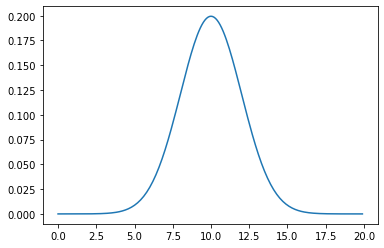

In [ ]:
mu = 10
sigma2 = 4

x_axis = np.arange(0, 20, 0.1)

g = []
for x in x_axis:
  g.append(f(mu, sigma2, x))

plt.plot(x_axis, g)

In [ ]:
gauss_2 = f(10, 4, 10)
print(gauss_2)

0.19947114020071635


In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

def f(mu, sigma2, x):
  coefficient = 1.0 / sqrt(2.0 * pi * sigma2)
  exponential = exp(-0.5 * (x - mu) ** 2 / sigma2)
  return coefficient * exponential

def update(mean1, var1, mean2, var2):
  new_mean = (mean1 * var2 + mean2 * var1) / (var1 + var2)
  new_var = 1 / (1 / var1 + 1 / var2)
  return new_mean, new_var

In [ ]:
new_params = update(10, 4, 12, 4)
print(new_params)

[11.0, 2.0]


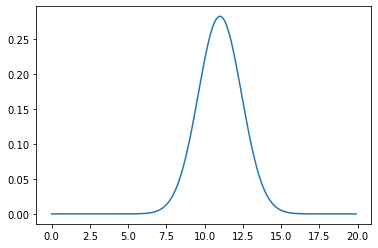

In [ ]:
mu = new_params[0]
sigma2 = new_params[1]

x_axis = np.arange(0, 20, 0.1)

g = []
for x in x_axis:
  g.append(f(mu, sigma2, x))

plt.plot(x_axis, g)

In [ ]:
def predict (mean1, var1, mean2, var2):
  new_mean = mean1 + mean2
  new_var = var1 + var2
  return new_mean, new_var

In [ ]:
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000

for i in range(len(measurements)):
  mu, sig = update(mu, sig, measurements[i], measurement_sig)
  print("Update [mu, sig] : ", [mu, sig])
  mu, sig = predict(mu, sig, motions[i], motion_sig)
  print("Predict [mu, sig] :", [mu, sig])

Update [mu, sig] :  [4.998000799680128, 3.9984006397441023]
Predict [mu, sig] : [5.998000799680128, 5.998400639744102]
Update [mu, sig] :  [5.999200191953932, 2.399744061425258]
Predict [mu, sig] : [6.999200191953932, 4.399744061425258]
Update [mu, sig] :  [6.999619127420922, 2.0951800575117594]
Predict [mu, sig] : [8.999619127420921, 4.09518005751176]
Update [mu, sig] :  [8.999811802788143, 2.0235152416216957]
Predict [mu, sig] : [9.999811802788143, 4.023515241621696]
Update [mu, sig] :  [9.999906177177365, 2.0058615808441944]
Predict [mu, sig] : [10.999906177177365, 4.005861580844194]


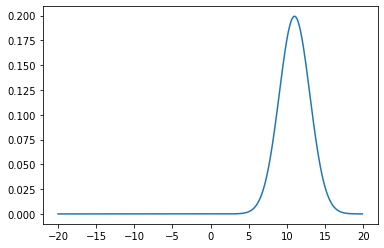

In [ ]:
x_axis = np.arange(-20, 20, 0.1)

g = []
for x in x_axis:
  g.append(f(mu, sig, x))

plt.plot(x_axis, g)

Update [mu, sig] :  [1.24999999996875e-10, 9.99999999975e-11]
Predict [mu, sig] : [1.000000000125, 2.0000000001]
Update [mu, sig] :  [2.6666666668055554, 1.3333333333777777]
Predict [mu, sig] : [3.6666666668055554, 3.3333333333777775]
Update [mu, sig] :  [5.1818181819049585, 1.8181818181950413]
Predict [mu, sig] : [7.1818181819049585, 3.8181818181950415]
Update [mu, sig] :  [8.069767441906436, 1.9534883720964848]
Predict [mu, sig] : [9.069767441906436, 3.953488372096485]
Update [mu, sig] :  [9.532163742713381, 1.9883040935681267]
Predict [mu, sig] : [10.532163742713381, 3.988304093568127]


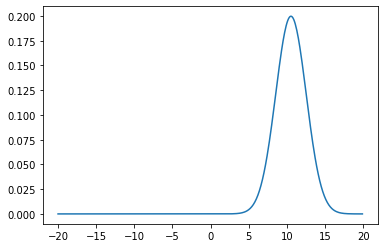

In [ ]:
# with very small uncertainty
mu = 0
sig = 0.0000000001

for i in range(len(measurements)):
  mu, sig = update(mu, sig, measurements[i], measurement_sig)
  print("Update [mu, sig] : ", [mu, sig])
  mu, sig = predict(mu, sig, motions[i], motion_sig)
  print("Predict [mu, sig] :", [mu, sig])

  x_axis = np.arange(-20, 20, 0.1)

g = []
for x in x_axis:
  g.append(f(mu, sig, x))

plt.plot(x_axis, g)